In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sift_feature_matching(img1_path, img2_path):
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(img1_gray, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2_gray, None)
    
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    img_matches = cv2.drawMatches(img1_rgb, keypoints1, img2_rgb, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(img_matches)
    plt.axis("off")
    plt.show()

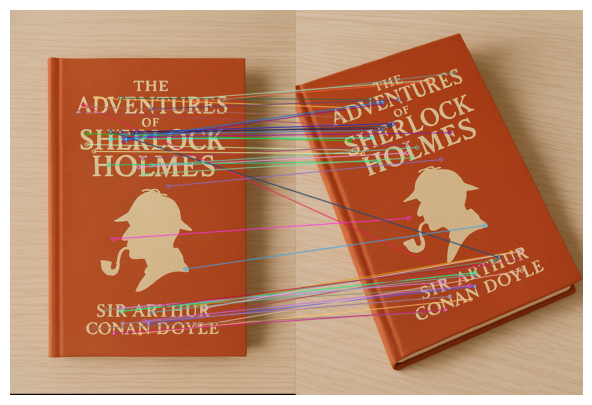

In [3]:
sift_feature_matching("image1.png", "image2.png")

In [4]:
def ransac_outlier_removal(img1_path, img2_path):
    img1_color = cv2.imread(img1_path, cv2.IMREAD_COLOR)
    img2_color = cv2.imread(img2_path, cv2.IMREAD_COLOR)
    
    img1_gray = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(img1_gray, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2_gray, None)
    
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
    matches_mask = mask.ravel().tolist()
    img1_rgb = cv2.cvtColor(img1_color, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2_color, cv2.COLOR_BGR2RGB)

    img_ransac = cv2.drawMatches(img1_rgb, keypoints1, img2_rgb, keypoints2, matches, None, matchesMask=matches_mask, flags=2)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(img_ransac)
    plt.axis("off")
    plt.show()

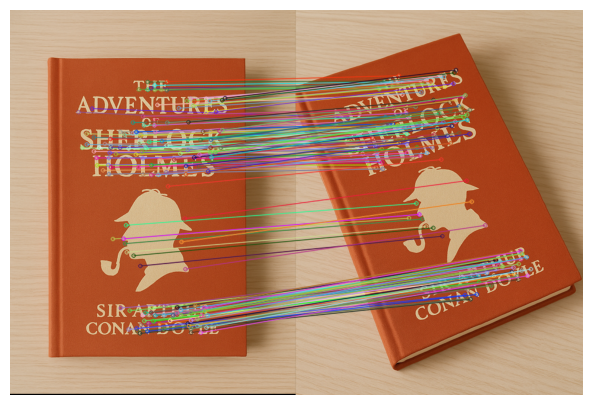

In [5]:
ransac_outlier_removal("image1.png", "image2.png")

In [6]:
def harris_corner_detection(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    img[dst > 0.01 * dst.max()] = [0, 0, 255]
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

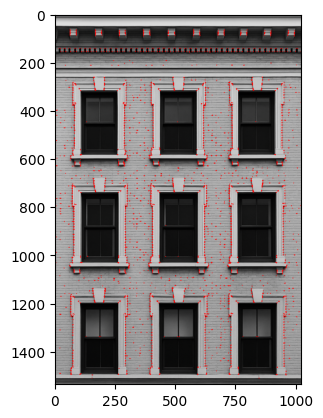

In [7]:
harris_corner_detection("image3.png")

In [8]:
image2 = cv2.imread("image2.png", cv2.IMREAD_COLOR)

(h, w) = image2.shape[:2]
center = (w // 2, h // 2)

M_45 = cv2.getRotationMatrix2D(center, 45, 1.0)
M_90 = cv2.getRotationMatrix2D(center, 90, 1.0)

image2_rotated_45 = cv2.warpAffine(image2, M_45, (w, h))
image2_rotated_90 = cv2.warpAffine(image2, M_90, (w, h))

image2_rotated_45_rgb = cv2.cvtColor(image2_rotated_45, cv2.COLOR_BGR2RGB)
image2_rotated_90_rgb = cv2.cvtColor(image2_rotated_90, cv2.COLOR_BGR2RGB)

In [26]:
def sift_feature_matching2(img1_path,img2):
    img1 = cv2.imread(img1_path)
    
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()
    keypoints1, descriptors1 = sift.detectAndCompute(img1_gray, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2_gray, None)
    
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    img_matches = cv2.drawMatches(img1_gray, keypoints1, img2_gray, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(img_matches)
    plt.axis("off")
    plt.show()

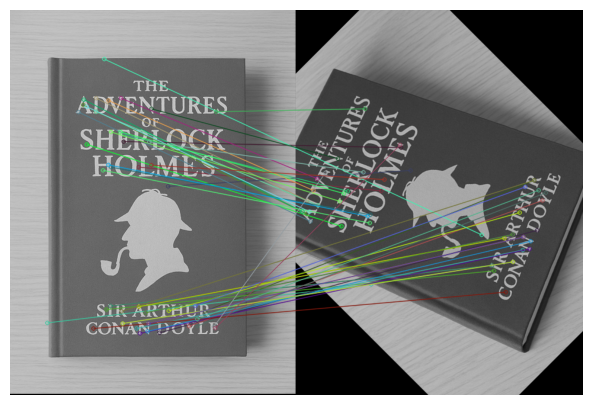

In [27]:
sift_feature_matching2("image1.png", image2_rotated_45_rgb)

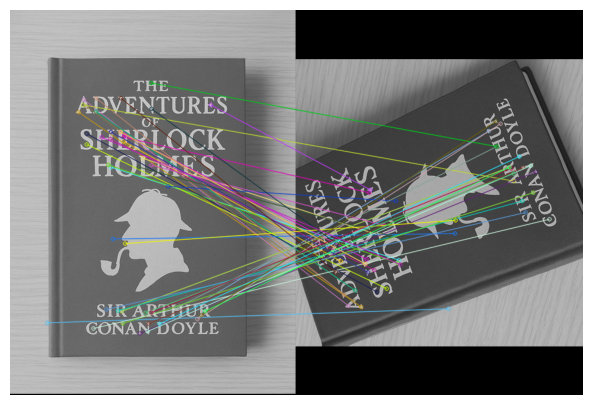

In [28]:
sift_feature_matching2("image1.png", image2_rotated_90_rgb)